In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _init_paths
import os
%matplotlib inline

In [2]:
import caffe

In [3]:
MODEL_FILE = '../models/Debug/train_triplet_embed64.prototxt'
MEAN_FILE = '../data/imagenet_mean.binaryproto'

In [4]:
blob1 = caffe.proto.caffe_pb2.BlobProto()
data1 = open(MEAN_FILE , 'rb').read()
blob1.ParseFromString(data1)
mean_arr = caffe.io.blobproto_to_array(blob1)[0]

In [5]:
#net = caffe.Net(MODEL_FILE, caffe.TRAIN)
net = caffe.Net(MODEL_FILE, caffe.TRAIN)

In [6]:
# running this grabs a new batch and pushes it through forward pass
batch = net.forward()

In [7]:
img_batch_anchor = net.blobs['data'].data.copy()

In [8]:
img_batch_positive = net.blobs['data_p'].data.copy()
img_batch_negative = net.blobs['data_n'].data.copy()

In [25]:
print img_batch_anchor.shape
print img_batch_positive.shape
print img_batch_negative.shape
idx = 21

(128, 3, 256, 256)
(128, 3, 256, 256)
(128, 3, 256, 256)


(3, 256, 256)


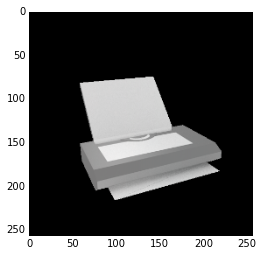

In [26]:
im1 = img_batch_anchor[idx,:,:,:] + mean_arr
im1 = np.transpose(im1, (1,2,0))
im1 = im1[:,:,(2,1,0)]
im1 = im1.astype(np.uint8)
print img_batch_anchor[idx,:,:,:].shape
plt.imshow(im1)

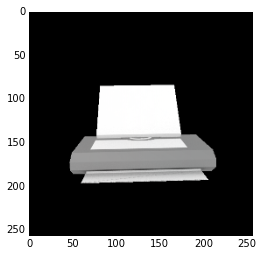

In [27]:
im2 = img_batch_positive[idx,:,:,:] + mean_arr
im2 = np.transpose(im2, (1,2,0))
im2 = im2[:,:,(2,1,0)] 
im2 = im2.astype(np.uint8)
plt.imshow(im2)

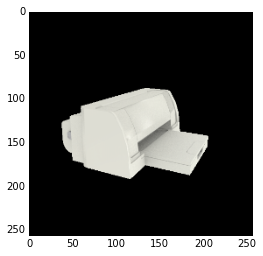

In [28]:
im3 = img_batch_negative[idx,:,:,:] + mean_arr
im3 = np.transpose(im3, (1,2,0))
im3 = im3[:,:,(2,1,0)] 
im3 = im3.astype(np.uint8)
plt.imshow(im3)